In [1]:
# Verify properties
import numpy as np
#initializing the sample matrices A and B
A = np.array([[1, 2], [3, 4]])
B = np.array([[2, 0], [1, 2]])

# Initialize a dictionary to store the results for verification
verification_results = {}

# Verify each property

# (AB)^T = B^T A^T
verification_results['(AB)^T'] = np.allclose(np.dot(A, B).T, np.dot(B.T, A.T))

# (AB)^-1 = B^-1 A^-1
verification_results['(AB)^-1'] = np.allclose(np.linalg.inv(np.dot(A, B)), np.dot(np.linalg.inv(B), np.linalg.inv(A)))

# A(B+C) = AB + AC
C = np.array([[1, 1], [1, 1]])  # Using a new matrix C for this property
verification_results['A(B+C)'] = np.allclose(np.dot(A, B + C), np.dot(A, B) + np.dot(A, C))

# (A^T)^-1 = (A^-1)^T
verification_results['(A^T)^-1'] = np.allclose(np.linalg.inv(A.T), np.linalg.inv(A).T)

# (A^T A)^T = A^T A
verification_results['(A^T A)^T'] = np.allclose((np.dot(A.T, A)).T, np.dot(A.T, A))


verification_results


{'(AB)^T': True,
 '(AB)^-1': True,
 'A(B+C)': True,
 '(A^T)^-1': True,
 '(A^T A)^T': True}

In [2]:
# Linear independance in python
# Define sets of vectors to check for linear independence and dependence
independent_vectors = np.array([[1, 0], [0, 1]])  # Should be independent
dependent_vectors = np.array([[1, 2], [2, 4]])    # Should be dependent

# Calculate the ranks
rank_independent = np.linalg.matrix_rank(independent_vectors)
rank_dependent = np.linalg.matrix_rank(dependent_vectors)

# Check for linear independence
is_independent = rank_independent == independent_vectors.shape[1]
is_dependent = rank_dependent == dependent_vectors.shape[1]

rank_independent, is_independent, rank_dependent, is_dependent


(2, True, 1, False)

In [3]:
# Inv Det transpose
# Define a sample square matrix A
A = np.array([[1, 2], [3, 4]])

# Calculate the transpose of A
transpose_A = np.transpose(A)

# Calculate the inverse of A
# Check if the matrix is invertible (determinant is not zero) before finding the inverse
if np.linalg.det(A) != 0:
    inverse_A = np.linalg.inv(A)
else:
    inverse_A = "Matrix is not invertible"

# Calculate the determinant of A
determinant_A = np.linalg.det(A)

# Calculate the trace of A
trace_A = np.trace(A)

transpose_A, inverse_A, determinant_A, trace_A


(array([[1, 3],
        [2, 4]]),
 array([[-2. ,  1. ],
        [ 1.5, -0.5]]),
 -2.0000000000000004,
 5)

In [4]:
# Rank of Matrix 
# Define a sample matrix for which we will find the rank
B = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])

# Calculate the rank of the matrix
rank_B = np.linalg.matrix_rank(B)

rank_B


2

In [5]:
# Covariance matrix
# Let's consider a simple dataset with two features x and y for demonstration
data = np.array([[1, 2], [2, 3], [3, 4], [4, 5], [5, 6]])

# Standardize the data (Optional but often recommended)
data_standardized = (data - np.mean(data, axis=0)) / np.std(data, axis=0)

# Calculate the covariance matrix
cov_matrix = np.cov(data_standardized.T)

cov_matrix



array([[1.25, 1.25],
       [1.25, 1.25]])

In [6]:
# Eigen values and Eigen vectors 
# Define a sample matrix for which we will find eigenvalues and eigenvectors
A = np.array([[2, 1], [1, 3]])

# Calculate eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(A)

eigenvalues, eigenvectors


(array([1.38196601, 3.61803399]),
 array([[-0.85065081, -0.52573111],
        [ 0.52573111, -0.85065081]]))

In [15]:
# Step By Step PCA in Python
# Importing necessary libraries
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Create a dataset with two features (x1 and x2) and 5 observations
data = np.array([[1, 2],
                 [2, 3],
                 [3, 4],
                 [4, 5],
                 [5, 6]])

# Step 1: Standardize the data
scaler = StandardScaler()
data_standardized = scaler.fit_transform(data)

# Step 2: Calculate the covariance matrix
cov_matrix = np.cov(data_standardized.T)

# Step 3: Calculate eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

# Step 4: Sort eigenvalues and their corresponding eigenvectors
sorted_index = np.argsort(eigenvalues)[::-1]
sorted_eigenvalues = eigenvalues[sorted_index]
sorted_eigenvectors = eigenvectors[:, sorted_index]

# Step 5: Select the top k eigenvectors
k = 1  # Number of principal components you want to keep
top_eigenvectors = sorted_eigenvectors[:, :k]

# Step 6: Project the data into the new subspace
principal_components = np.dot(data_standardized, top_eigenvectors)

data_standardized, cov_matrix, eigenvalues, eigenvectors, sorted_eigenvalues, sorted_eigenvectors, principal_components


(array([[-1.41421356, -1.41421356],
        [-0.70710678, -0.70710678],
        [ 0.        ,  0.        ],
        [ 0.70710678,  0.70710678],
        [ 1.41421356,  1.41421356]]),
 array([[1.25, 1.25],
        [1.25, 1.25]]),
 array([ 2.50000000e+00, -2.77555756e-16]),
 array([[ 0.70710678, -0.70710678],
        [ 0.70710678,  0.70710678]]),
 array([ 2.50000000e+00, -2.77555756e-16]),
 array([[ 0.70710678, -0.70710678],
        [ 0.70710678,  0.70710678]]),
 array([[-2.],
        [-1.],
        [ 0.],
        [ 1.],
        [ 2.]]))

In [7]:
# Svd python 
# Given matrix A
A = np.array([[1, 2], [3, 4], [5, 6]])

# Perform Singular Value Decomposition (SVD)
U, S, VT = np.linalg.svd(A)

U, S, VT


(array([[-0.2298477 ,  0.88346102,  0.40824829],
        [-0.52474482,  0.24078249, -0.81649658],
        [-0.81964194, -0.40189603,  0.40824829]]),
 array([9.52551809, 0.51430058]),
 array([[-0.61962948, -0.78489445],
        [-0.78489445,  0.61962948]]))

In [8]:
#To solve the system of equations
# Let's consider a simple system of equations for demonstration:
# 2x + 3y = 8
# 5x - y = 7

# Define the coefficient matrix and the constant vector
A = np.array([[2, 3], [5, -1]])
b = np.array([8, 7])

# Solve the system of equations
x, y = np.linalg.solve(A, b)

x, y


(1.7058823529411764, 1.5294117647058825)

In [9]:
# Derivative in Python
from sympy import symbols, diff

# Declare the variable
x = symbols('x')

# Define the function for which you want to find the derivative
# For demonstration, let's consider the function f(x) = x^2 + 2x + 1
f = x**2 + 2*x + 1

# Compute the derivative
derivative_f = diff(f, x)

derivative_f


2*x + 2

In [10]:
#Partial Derivative in python
from sympy import symbols, diff

# Declare the variables
x, y, z = symbols('x y z')

# Define the function for which you want to find the partial derivatives
# For demonstration, let's consider the function f(x, y, z) = x^2 + y^2 + z^2
f = x**2 + y**2 + z**2

# Compute the partial derivatives
partial_x = diff(f, x)
partial_y = diff(f, y)
partial_z = diff(f, z)

partial_x, partial_y, partial_z


(2*x, 2*y, 2*z)

In [11]:
# Jacobian in Python
from sympy import Matrix

# Declare the variables
x, y = symbols('x y')

# Define the functions for which you want to find the Jacobian
# For demonstration, let's consider the functions f(x, y) = x^2 + y and g(x, y) = x + y^2
f = x**2 + y
g = x + y**2

# Create a vector of functions
F = Matrix([f, g])

# Compute the Jacobian with respect to x and y
Jacobian = F.jacobian([x, y])

Jacobian


Matrix([
[2*x,   1],
[  1, 2*y]])

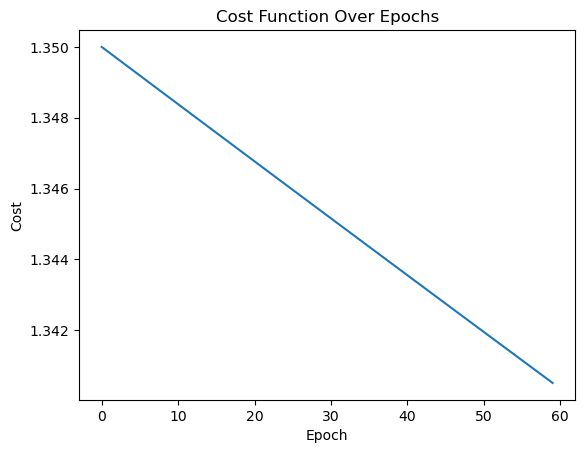

(0.501614278297858, 1.0005384106280457)

In [12]:
# Simple Regression in Python
import matplotlib.pyplot as plt

# Generate some sample data for x and y
x = np.array([1, 2, 3, 4, 5])
y = np.array([2, 4, 3, 3, 5])

# Initialize parameters a and b
a = 0.5
b = 1

# Define the learning rate and number of epochs
learning_rate = 0.000001
epochs = 60

# Store the cost at each epoch
cost_history = []

# Run Gradient Descent
for epoch in range(epochs):
    # Predict y using current a and b
    y_pred = a * x + b
    
    # Compute the loss (Mean Squared Error)
    loss = np.mean((y - y_pred)**2)
    cost_history.append(loss)
    
    # Compute the gradients for a and b
    da = -2 * np.sum(x * (y - y_pred))
    db = -2 * np.sum(y - y_pred)
    
    # Update a and b
    a -= learning_rate * da
    b -= learning_rate * db

# Plot the cost function
plt.plot(range(epochs), cost_history)
plt.xlabel('Epoch')
plt.ylabel('Cost')
plt.title('Cost Function Over Epochs')
plt.show()

# Optimal values of a and b
a, b
